<a href="https://colab.research.google.com/github/AnjaliRai24/RandomForestClassifier/blob/main/rANDOMfOREST_cLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("Fraud_check.csv")

print("📋 Dataset Preview:")
display(df.head())

print("\n📊 Dataset Information:")
print(df.info())

📋 Dataset Preview:


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB
None


In [ ]:
print("\n🔢 Shape of the dataset:", df.shape)
print("\n✅ Missing Values Check:")
print(df.isnull().sum())

print("\n📈 Basic Statistics:")
display(df.describe())


🔢 Shape of the dataset: (600, 6)

✅ Missing Values Check:
Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

📈 Basic Statistics:


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000



🎯 Target Variable Distribution:
Taxable.Income_Status
Good     476
Risky    124
Name: count, dtype: int64


/tmp/ipython-input-565412935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Taxable.Income_Status", data=df, palette="Set2")


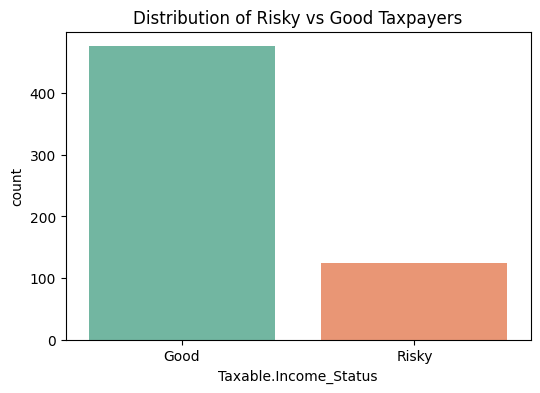

In [ ]:
df["Taxable.Income_Status"] = df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")

print("\n🎯 Target Variable Distribution:")
print(df["Taxable.Income_Status"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Taxable.Income_Status", data=df, palette="Set2")
plt.title("Distribution of Risky vs Good Taxpayers")
plt.show()

In [ ]:
df = df.drop(columns=["Taxable.Income"])

# Encode categorical columns
label_enc = LabelEncoder()
for col in ["Undergrad", "Marital.Status", "Urban", "Taxable.Income_Status"]:
    df[col] = label_enc.fit_transform(df[col])

print("\n🔠 Encoded Columns Sample:")
display(df.head())


🔠 Encoded Columns Sample:


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [ ]:
X = df.drop(columns=["Taxable.Income_Status"])
y = df["Taxable.Income_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("\n✅ Data Split Done:")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])



✅ Data Split Done:
Training Samples: 450
Testing Samples: 150


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    criterion="entropy",
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print("\n🎯 Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))



🎯 Model Performance:
Accuracy: 74.67 %

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       119
           1       0.00      0.00      0.00        31

    accuracy                           0.75       150
   macro avg       0.39      0.47      0.43       150
weighted avg       0.62      0.75      0.68       150



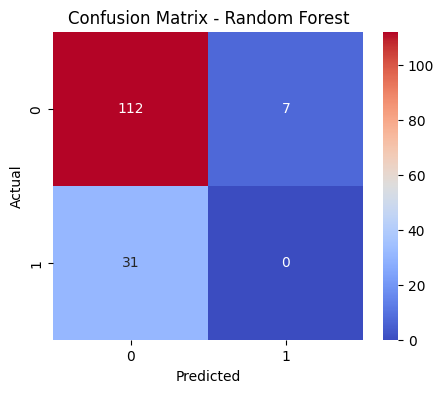

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-2320848390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")


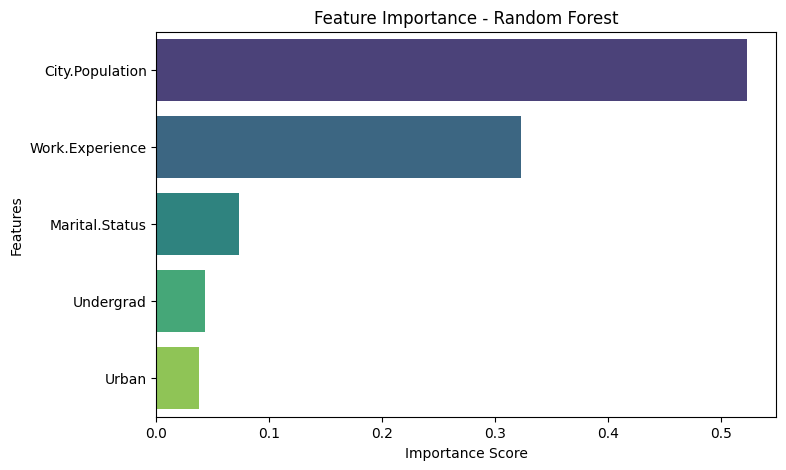


📈 Feature Importance Table:


,0
City.Population,0.523094
Work.Experience,0.322902
Marital.Status,0.073027
Undergrad,0.042870
Urban,0.038107


In [ ]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("\n📈 Feature Importance Table:")
display(feature_imp)


In [ ]:
print("\n✅ Random Forest Fraud Detection Project Completed Successfully!")


✅ Random Forest Fraud Detection Project Completed Successfully!
